## Winter 2022 Data Science Intern Challenge 

- ##### Company - Shopify
- ##### Author - Gayathri Gopalan

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set


In [14]:
import pandas as pd

In [15]:
df= pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [16]:
df.head(4)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

AOV (Average Order Value)- It is the average amount spent each time a customer places an order of the shoe
Since Sneakers are relatively affordable, and also that an individual cannot spend an average of $3145 on an order. 

Current AOV calculation = (x1+x2+x3+…+xn)/n 

This calculation of the average of order amount is wrong. Since it has some of the value that have huge numbers. Let’s take the median and standard deviation of this column.

| Metric | Value |
| --- | ----------- |
| Median | 284 |
| Std Dev | 41,282.54 |
| Average | 3145.128 |


In [30]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see that the standard deviation is too high. It implies that the dispersion of data is too much which could be due to outliers. 

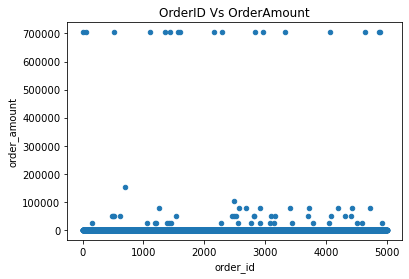

In [36]:
ax2 = df.plot.scatter(x='order_id',y='order_amount',colormap='viridis',title="OrderID Vs OrderAmount")

This proves that the outliers (in range of 200k-700k) is causing the average to an unrealistic number. Now let’s try to remove the records which have unexpected order amounts (>100000).

In [19]:
df2=df[df['order_amount'] < 100000]

In [20]:
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,2501.425216,50.095162,849.915880,702.748444,1.992773
std,1443.152284,29.052172,86.816531,4627.726634,0.981326
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1251.000000,24.000000,776.000000,163.000000,1.000000
50%,2503.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,77175.000000,8.000000


The std dev has reduced, but is still higher. Lets also take a look at max value for the 4th quartile order amt is 77175.00. Let's further remove the orders greater than 10k

In [21]:
df2[df2['order_amount'] < 10000].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


Here the AOV=$302.58 which looks like a realistic value for the avg order amt placed by each customer. Hence this would be a better solution.

#### b.	What metric would you report for this dataset?

We can check two main metrics here:

    - High Valued Customers (HVA): User_id vs order amount and total items(To see who purchased - To target customers)
    - High Valued shops (HVS): Shop_id vs order amount and total items to know which shop made the most sales etc

In [37]:
df_grouped=df.groupby(by='user_id').agg({'order_amount':'sum', 'total_items':'sum'}).reset_index()

In [38]:
df_grouped

,user_id,order_amount,total_items
0,607,11968000,34000
1,700,4790,30
2,701,5162,34
3,702,5286,34
4,703,6091,41
...,...,...,...
296,995,5316,35
297,996,5312,37
298,997,29236,24
299,998,2620,18


In [39]:
# Now lets sort 
df_grouped.sort_values(by=['order_amount', 'total_items'], ascending=False)

,user_id,order_amount,total_items
0,607,11968000,34000
179,878,156936,24
135,834,108342,38
88,787,85707,57
270,969,84269,50
...,...,...,...
51,750,2359,15
18,717,2337,16
20,719,2314,15
240,939,2196,15


- User IDs **607** is makinng bulk purchases of items and gives the max revenue (they could be a whole sale retailer or small business). 
- Followed by are user ids **878, 834** who are elite buyers purchasing expensive sneakers.


These customers could be targetted for promotional offers, to encourage their purchasing capabilities and build more trust with the company

In [29]:
df_groupshop=df.groupby(by='shop_id').agg({'order_amount':'sum', 'total_items':'sum'}).reset_index()
df_groupshop.sort_values(by=['order_amount', 'total_items'], ascending=False)

,shop_id,order_amount,total_items
41,42,11990176,34063
77,78,2263800,88
88,89,23128,118
80,81,22656,128
5,6,22627,121
...,...,...,...
1,2,9588,102
99,100,8547,77
55,56,8073,69
31,32,7979,79


- Shop IDs **42** is doing good with a revenue of 11.9M and total item sale of 34K shoes
- Followed by are user ids **78** which sells expensive sneakers for a high revenue of 2M

These shops can be improved with more investments and seasonal offers

## Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


### a.	How many orders were shipped by Speedy Express in total?

```
SELECT count(OrderID) as Total_Orders
FROM Orders as O
inner join Shippers as S
on S.ShipperID=O.ShipperID
where S.ShipperName='Speedy Express'
```

ANS: 54

### b.	What is the last name of the employee with the most orders?

```
SELECT E.LastName, count(OrderID) as Most_Orders
FROM Employees as E
inner join Orders as O
on E.EmployeeID=O.EmployeeID
group by E.LastName
order by count(OrderID) desc
```

ANS:
Peacock 	40 

### c.	What product was ordered the most by customers in Germany?

```
SELECT P.ProductName, sum(OD.Quantity) as Most_Ordered
FROM Customers as C, Orders as O, OrderDetails as OD, Products as P
where C.Country='Germany'
and C.CustomerID=O.CustomerID
and O.OrderID=OD.OrderID
and OD.ProductID=P.ProductID
group by P.ProductName
order by sum(OD.Quantity) desc
```

ANS:
Boston Crab Meat 





### Thank you